In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
df=pd.read_csv("train.csv")

In [179]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [181]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [182]:
dep=df['Survived']
ind=df.drop(['Survived'],axis='columns')

In [183]:
ind

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [184]:
dummy=pd.get_dummies(data=ind['Sex'])

In [185]:
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [186]:
ind=pd.concat([ind,dummy],axis='columns')

In [187]:
ind=ind.drop('Sex',axis='columns')

In [188]:
ind

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [189]:
ind.columns[ind.isna().any()]

Index(['Age'], dtype='object')

In [190]:
ind.Age[:15]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

In [191]:
from sklearn.impute import SimpleImputer

In [192]:
SI=SimpleImputer(strategy='mean')

In [193]:
ind['Age']=SI.fit_transform(ind[['Age']])

In [194]:
ind.Age[:15]

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
Name: Age, dtype: float64

In [195]:
ind.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1


In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test=train_test_split(ind,dep,test_size=0.3,random_state=1)

In [198]:
len(X_train)

623

In [199]:
len(X_test)

268

In [200]:
len(y_train)

623

In [201]:
len(ind)

891

In [202]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [203]:
model.fit(X_train,y_train)

GaussianNB()

In [204]:
model.score(X_test,y_test)

0.7611940298507462

In [205]:
X_test[:10]

,Pclass,Age,Fare,female,male
862,1,48.000000,25.9292,1,0
223,3,29.699118,7.8958,0,1
84,2,17.000000,10.5000,1,0
680,3,29.699118,8.1375,1,0
535,2,7.000000,26.2500,1,0
623,3,21.000000,7.8542,0,1
148,2,36.500000,26.0000,0,1
3,1,35.000000,53.1000,1,0
34,1,28.000000,82.1708,0,1
241,3,29.699118,15.5000,1,0


In [206]:
y_test[:10]

862    1
223    0
84     1
680    0
535    1
623    0
148    0
3      1
34     0
241    1
Name: Survived, dtype: int64

In [207]:
model.predict(X_test[:10])

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [208]:
model.predict_proba(X_test[:10])

array([[0.0051689 , 0.9948311 ],
       [0.99230645, 0.00769355],
       [0.01783264, 0.98216736],
       [0.05272674, 0.94727326],
       [0.01101876, 0.98898124],
       [0.99099505, 0.00900495],
       [0.98156245, 0.01843755],
       [0.00367755, 0.99632245],
       [0.75319294, 0.24680706],
       [0.052367  , 0.947633  ]])

Confusion Matrix


<AxesSubplot:>

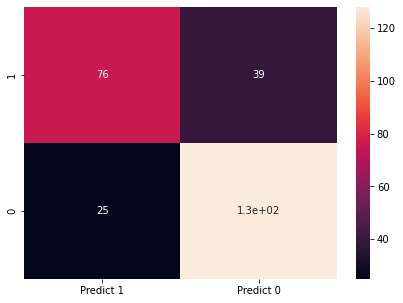

In [209]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, model.predict(X_test),labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [210]:
print("Classification Report")
print(metrics.classification_report(y_test, model.predict(X_test), labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.66      0.70       115
           0       0.77      0.84      0.80       153

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



# If Separate Train and test data set is given

In [211]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [212]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [213]:
dummy1=pd.get_dummies(data=df_train['Sex'])
dummy2=pd.get_dummies(data=df_test['Sex'])

In [214]:
inde_train=pd.concat([df_train,dummy1],axis='columns')
inde_test=pd.concat([df_test,dummy2],axis='columns')


In [215]:
inde_train.drop('Sex',axis='columns',inplace=True)
inde_test.drop('Sex',axis='columns',inplace=True)

In [216]:
inde_train['Age']=SI.fit_transform(inde_train[['Age']])
inde_test['Age']=SI.fit_transform(inde_test[['Age']])

In [217]:
inde_train.columns[inde_train.isna().any()]

Index([], dtype='object')

In [218]:
inde_test.columns[inde_test.isna().any()]

Index(['Fare'], dtype='object')

In [219]:
inde_test['Fare']=SI.fit_transform(inde_test[['Fare']])

In [220]:
X_train1, y_train1 = inde_train.drop(["Survived"],axis='columns'), inde_train["Survived"]
X_test1,y_test1= inde_test.drop(["Survived"],axis='columns'), inde_test["Survived"]

In [221]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()

In [223]:
model1.fit(X_train1,y_train1.ravel())

GaussianNB()

### Performance of our model with training data

In [224]:
train_predict = model1.predict(X_train1)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train1, train_predict)))
print()

Model Accuracy: 0.7811



### Performance of our model with testing data

In [225]:
test_predict = model1.predict(X_test1)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test1, test_predict)))
print()

Model Accuracy: 0.9665



### Lets check the confusion matrix and classification report 

Confusion Matrix


<AxesSubplot:>

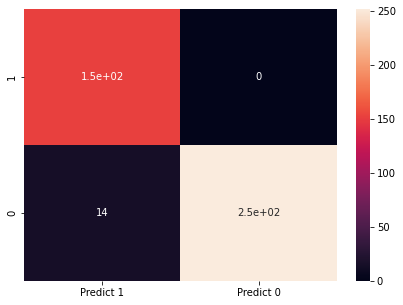

In [226]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test1, test_predict,labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [227]:
print("Classification Report")
print(metrics.classification_report(y_test1, test_predict, labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.92      1.00      0.96       152
           0       1.00      0.95      0.97       266

    accuracy                           0.97       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.97      0.97      0.97       418



In [228]:
model1.score(X_test1,y_test1)

0.9665071770334929